## Final Project

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.optimizers import SGD
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar100, cifar10


In [9]:
#load data 

(x_train, y_train), (x_test, y_test) = cifar100.load_data('fine')

x_train = x_train.astype('float32')
x_train = x_train / 255.0

x_test = x_test.astype('float32')
x_test = x_test / 255.0
    
# One-hot encoding for 100 classes.
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


In [7]:
# plot first few images
# for i in range(9):
#     plt.subplot(3,3,1+i) # subplot 3 rows, 5 columns, ith subplot
#     plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# plt.show()

In [6]:
# Model 
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPool2D())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D())
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPool2D())
    model.add(Dropout(0.2))
    
    model.add(Flatten())   
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='softmax'))
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])
    return model
    
def diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')



In [7]:

model = build_model()
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data(x_test, y_test), verbose=1)
# Save Model
print('Saving Model...')

model.save("m1.h5")

Epoch 1/60
625/625 [==============================] - 42s 67ms/step - loss: 4.6039 - accuracy: 0.0113 - val_loss: 4.5997 - val_accuracy: 0.0114
Epoch 2/60
625/625 [==============================] - 45s 71ms/step - loss: 4.5703 - accuracy: 0.0154 - val_loss: 4.5195 - val_accuracy: 0.0199
Epoch 3/60
625/625 [==============================] - 45s 72ms/step - loss: 4.5083 - accuracy: 0.0187 - val_loss: 4.4804 - val_accuracy: 0.0221
Epoch 4/60
625/625 [==============================] - 45s 72ms/step - loss: 4.4817 - accuracy: 0.0204 - val_loss: 4.4508 - val_accuracy: 0.0288
Epoch 5/60
625/625 [==============================] - 45s 71ms/step - loss: 4.4390 - accuracy: 0.0250 - val_loss: 4.3814 - val_accuracy: 0.0288
Epoch 6/60
625/625 [==============================] - 45s 71ms/step - loss: 4.3769 - accuracy: 0.0292 - val_loss: 4.3259 - val_accuracy: 0.0362
Epoch 7/60
625/625 [==============================] - 43s 69ms/step - loss: 4.3059 - accuracy: 0.0379 - val_loss: 4.2367 - val_accuracy:

> 34.870


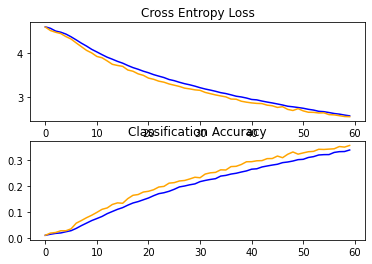

In [8]:
# evaluate model
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
diagnostics(history)